#Introduction to Recurrent Neural Network

Recurrent Neural Network also known as (RNN) that works better than a simple neural network when data is sequential like Time-Series data and text data.

RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations. Another way to think about RNNs is that they have a “memory” which captures information about what has been calculated so far.

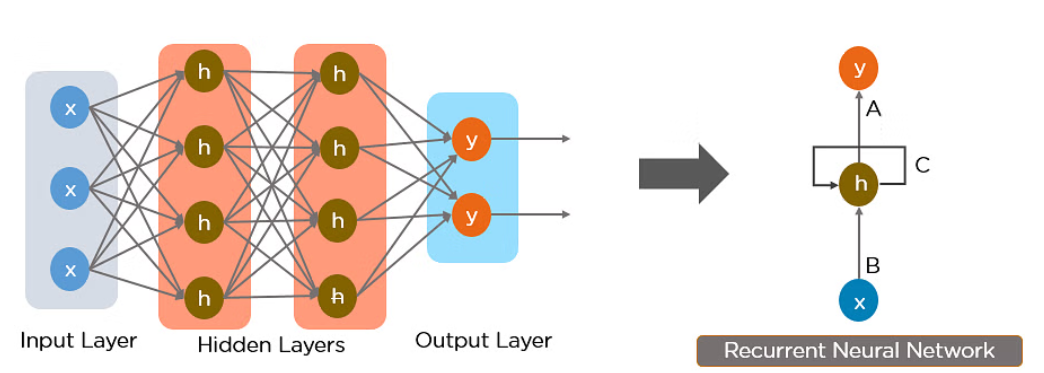

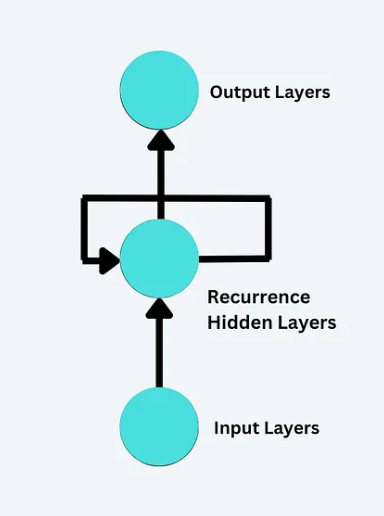

**Basic RNN Architecture**
A basic RNN consists of the following components:

**1. Input Layer**
The input layer takes the sequential data (e.g., a series of words or characters) and feeds it into the network.

Example: If you are processing a sentence, each word or character in the sentence will be fed into the RNN one at a time.

**2. Hidden Layer**
The hidden layer processes each input in the sequence and maintains a hidden state, which is updated at each time step.

**Hidden State:** A set of neurons that store information about previous inputs in the sequence. The hidden state is updated using the current input and the previous hidden state.

**Activation Function:** Usually, a non-linear function such as tanh or ReLU is applied to compute the hidden state.

**3. Output Layer**
The output layer produces the output at each time step, based on the current hidden state.

**Output:**The output can be a probability distribution over the next possible elements in the sequence, or a predicted value.

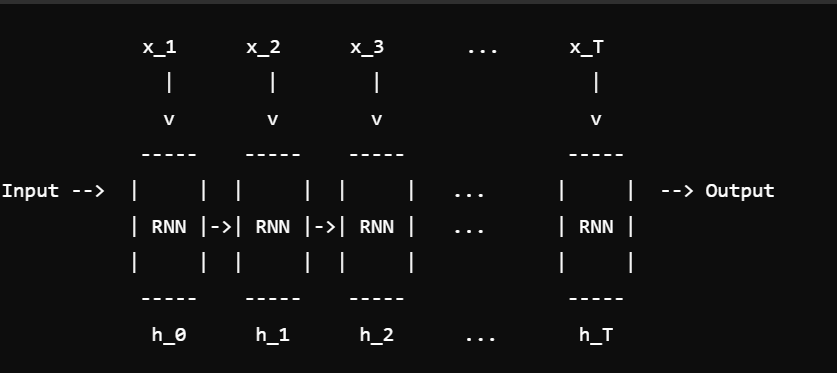

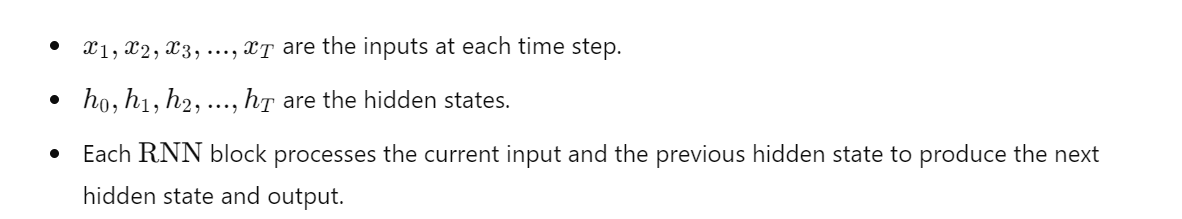

#TYPE OF RNN

# 1.Long Short-Term Memory (LSTM) Networks:

LSTMs are a type of RNN designed to handle long-term dependencies.
They introduce a memory cell that can maintain its state over time, and gates that control the flow of information.

**input gate** decides which information to store in the memory cell. It is trained to open when the input is important and close when it is not.

**forget gate** decides which information to discard from the memory cell. It is trained to open when the information is no longer important and close when it is.

**output gate** is responsible for deciding which information to use for the output of the LSTM. It is trained to open when the information is important and close when it is not.

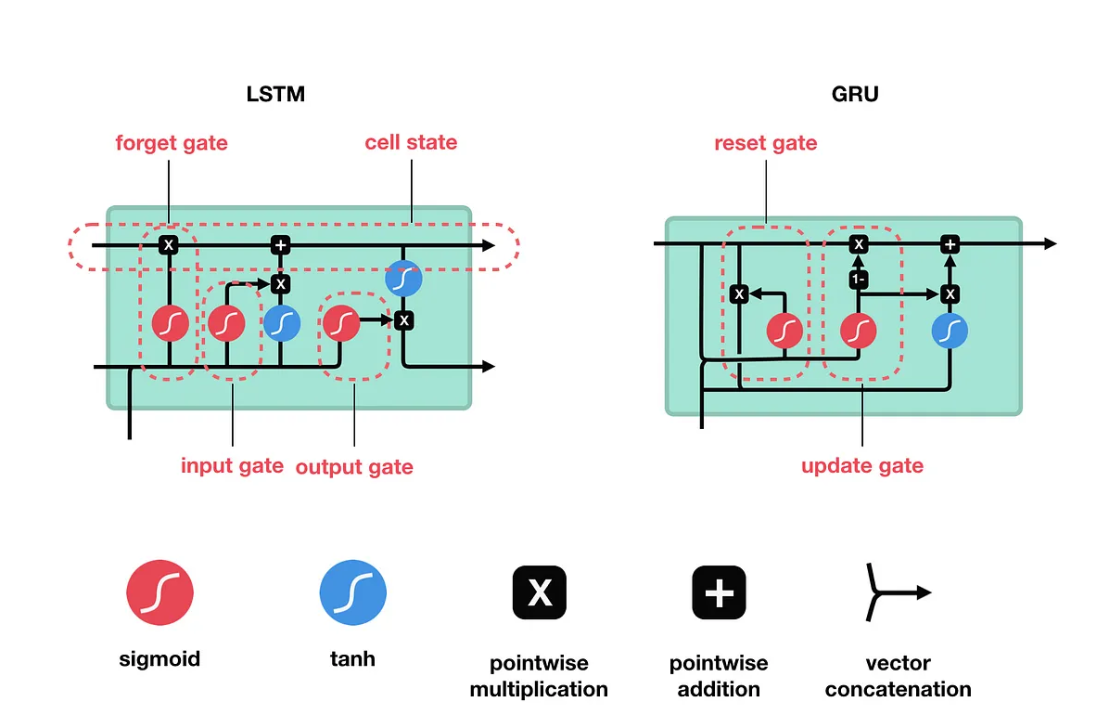

#2.GRU

**What is a Gated Recurrent Unit (GRU)?**

A. GRU is a type of recurrent neural network (RNN) that uses gating mechanisms to process sequential data. It's to remember long-term dependencies and forget irrelevant information

GRUs are similar to Long Short-Term Memory (LSTM) networks but have a simpler structure.

GRUs require less memory.


1. Update Gate

Controls how much of the previous state needs to be passed to the current state.
Helps the model to retain the useful information from the past.


2. Reset Gate

Determines how much of the past information to forget.
Helps the model to reset the state when necessary.

3. Current Memory Content

Creates a new candidate state that could replace the previous state.
Combines the reset gate and the input.

4. Final Memory at Current Time Step

The final hidden state for the current time step, which is a combination of the previous hidden state and the candidate state, weighted by the update gate.



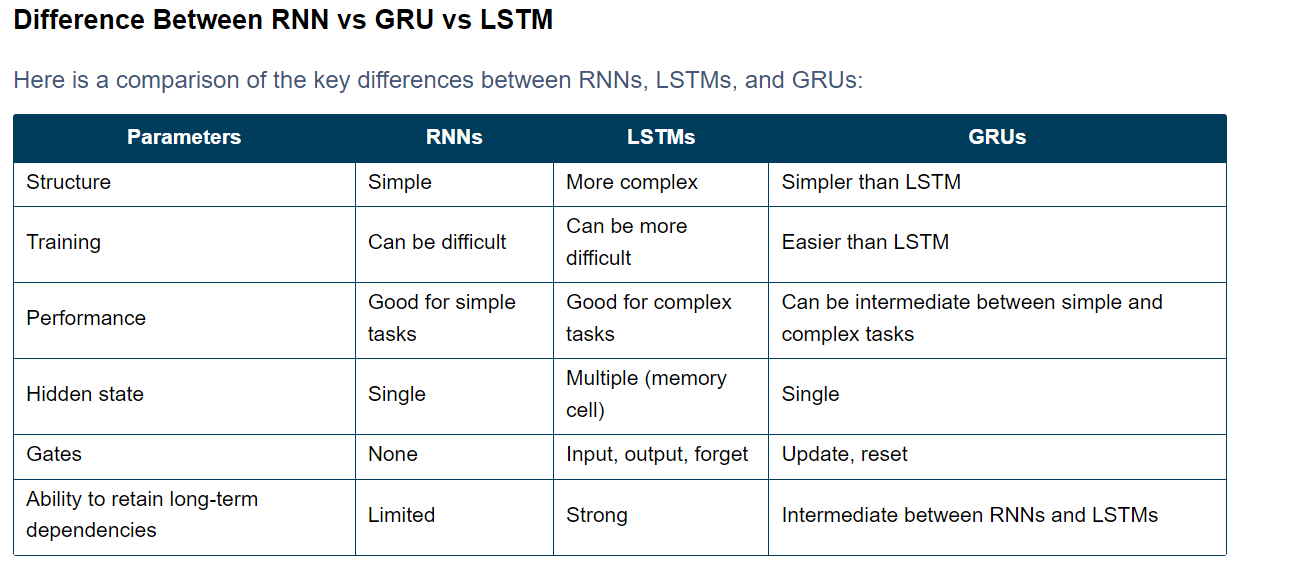


RNNs: Used for simple sequence tasks but limited by vanishing gradients.

LSTMs: Preferred for tasks requiring long-term dependencies.

GRUs: Used for efficient training while maintaining good performance.

# Sequence Modeling and Time Series Analysis


Sequence modeling involves predicting future elements of a sequence based on past elements. Common applications include language modeling, machine translation, and time series forecasting.

Time Series Forecasting:

Predicting future values based on past data points.
Applications: Stock price prediction, weather forecasting, demand forecasting.

#Application of RNN, LSTM, GRU

1. Natural Language Processing (NLP)

Text Generation

Machine Translation

2. Time Series Forecasting

Stock Price Prediction

Weather Forecasting

Demand Forecasting



3. Speech Recognition

 Audio Transcription

#Text Preprocessing and Word Embeddings


**Text Preprocessing:**

It involves several steps to clean and prepare raw text data for analysis.

**1.Tokenization:** Splitting text into individual words or tokens.

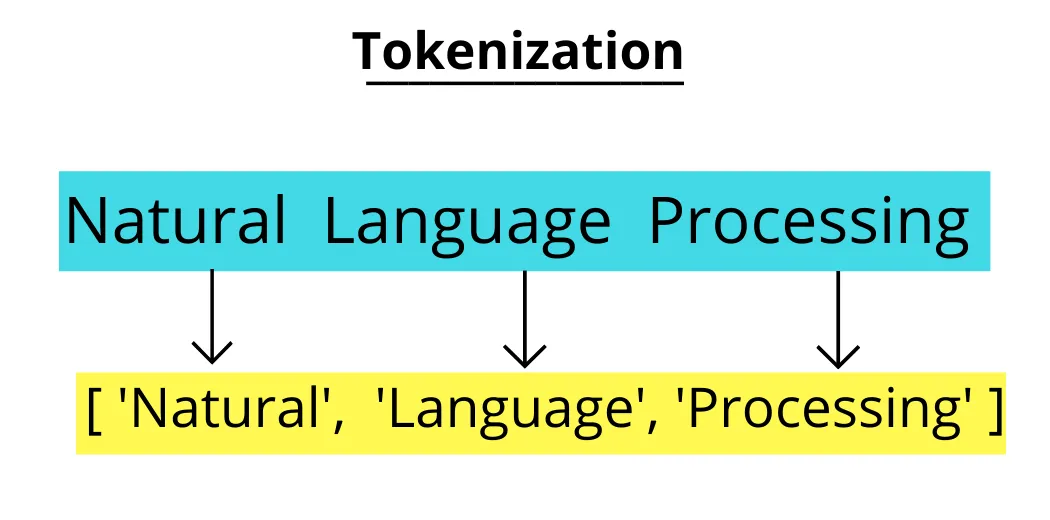

**2.Lowercasing:** Converting all text to lowercase to ensure uniformity.

**3. Removing Punctuation:** Eliminating punctuation marks.

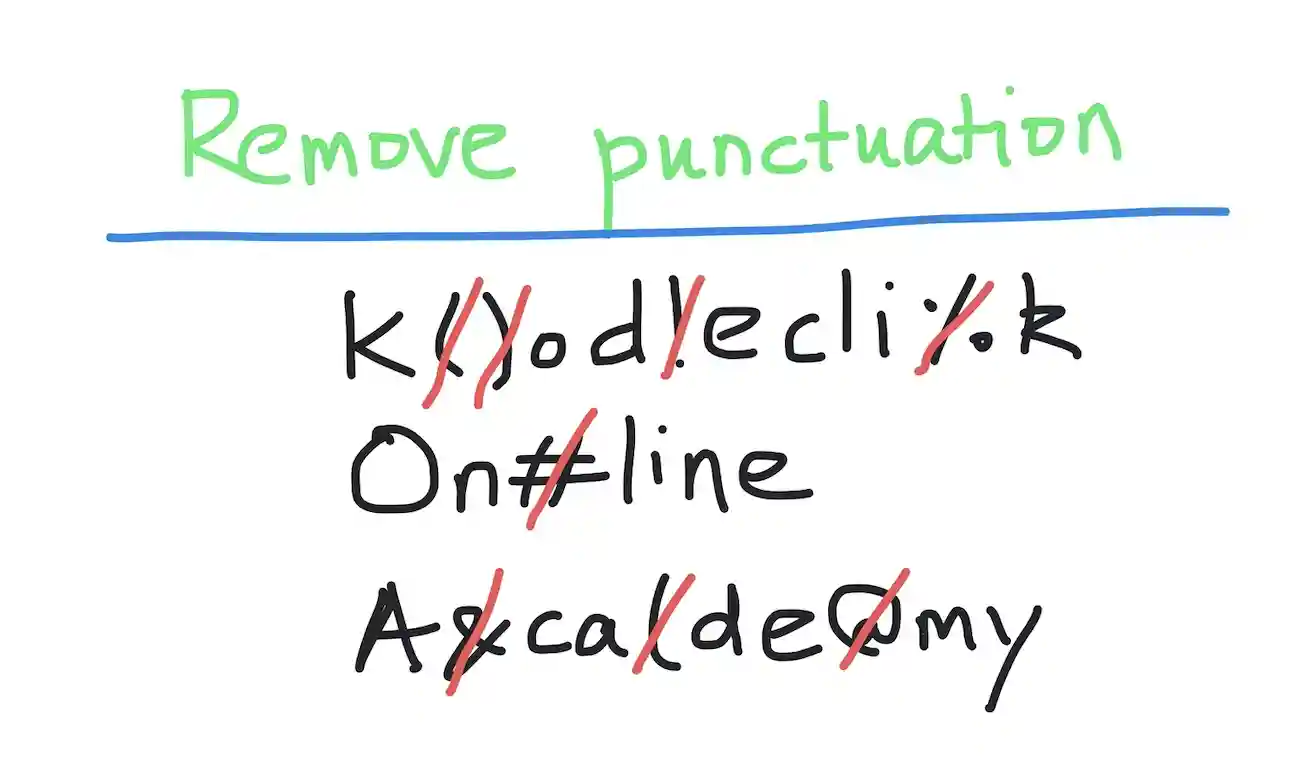

**4.Removing Stop Words:** Removing common words that may not contribute significantly to the meaning (e.g., "and," "the").

**5.Stemming and Lemmatization:** Reducing words to their root form (e.g., "running" to "run").

**6.Removing Numbers:** Depending on the context, numbers may be removed.

**7.Handling Special Characters:** Removing or transforming special characters (e.g., emojis, HTML tags).

#Word Embeddings:

Word embeddings
words that capture their meanings and relationships.

**1.Word2vec** is a technique in natural language processing (NLP) for obtaining vector representations of words.

**2. FastText**  Extends Word2Vec by considering subword information

FastText represents each word as a bag of character n-grams in addition to the whole word itself. This means that the word “apple” is represented by the word itself and its constituent n-grams like “ap”, “pp”, “pl”, “le”, etc. This approach helps capture the meanings of shorter words and affords a better understanding of suffixes and prefixes.

#Language Modeling and Sentiment Analysis
**Language Modeling:**
Language models predict the next word in a sequence, based on the previous words. Key applications include:

**1.Autocomplete**: Predicting the next word as the user types.

**2.Text Generation**: Generating coherent text based on a given prompt.


**Popular models:**

**RNNs**: Basic sequence models.

**LSTMs** and **GRUs**: Handle long-term dependencies.

**Transformers**: State-of-the-art models like GPT-3/4 and BERT for powerful language understanding and generation.

#Sentiment Analysis:
Sentiment analysis determines the sentiment (positive, negative, neutral) expressed in text. Techniques include:

**Traditional Machine Learning:** Using algorithms like Naive Bayes, SVM, with features such as TF-IDF vectors.

**Deep Learning:** Using RNNs, LSTMs, GRUs, or transformers (e.g., BERT) to capture contextual information and sentiment.

#Named Entity Recognition (NER) and Part-of-Speech (POS) Tagging
**NER** helps us to identify and classify named entities in text, such as people, organizations, locations, and dates

**POS**  that involves assigning a grammatical category or part-of-speech label (such as noun, verb, adjective, etc.) to each word in a sentence.

# Sequence-to-Sequence Models and Machine Translation

**Sequence-to-Sequence Models:**
Seq2Seq models convert an input sequence into an output sequence, commonly used in translation, summarization, and chatbots.

**Machine Translation:**
Machine translation translates text from one language to another.

#Sentiment Analysis with an LSTM

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [2]:
# Sample data (text and corresponding labels)
texts = ["I love this movie", "I hate this movie", "This movie is amazing", "This movie is terrible"]
labels = [1, 0, 1, 0]  # 1 = Positive, 0 = Negative

In [3]:
# Text preprocessing
tokenizer = Tokenizer(num_words=100)  # Consider the top 100 words
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [4]:
# Pad sequences to ensure equal length
data = pad_sequences(sequences, maxlen=5)

In [27]:
# Convert labels to numpy array
labels = np.array(labels) #labels is an array of 0s and 1s indicating negative and positive sentiments respectively.

In [25]:
# Build a simple LSTM model
model = Sequential()
model.add(Embedding(input_dim=100, output_dim=8, input_length=5))  # Embedding layer
# input_dim=100: This specifies the size of the vocabulary. We set it to 100, meaning it will look at the top 100 most frequent words.
# output_dim=8: This specifies the size of the dense vectors (embeddings). Each word will be represented by an 8-dimensional vector.
# input_length=5: This specifies the length of the input sequences.
model.add(LSTM(8))  # LSTM layer with 8 units
model.add(Dense(1, activation='sigmoid'))  # Output layer
#Dense Layer: Outputs a single value between 0 and 1
#1: This specifies that there is a single output unit

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#adam Adjusts model parameters to minimize the loss.
#Loss Function ('binary_crossentropy'): Measures the difference between actual labels and predicted probabilities


In [28]:
# Train the model
model.fit(data, labels, epochs=5, batch_size=2)
#epochs: An epoch is one complete pass through the entire training dataset
#batch_size=2: The model will update its weights after every 2 samples.



Epoch 1/5
15/15 [==============================] - 2s 5ms/step - loss: 0.6931 - accuracy: 0.5517
Epoch 2/5
15/15 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5862
Epoch 3/5
15/15 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.6897
Epoch 4/5
15/15 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.6897
Epoch 5/5
15/15 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.8966


In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(data, labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1/1 [==============================] - 1s 542ms/step - loss: 0.6928 - accuracy: 0.5000
Loss: 0.6927748918533325
Accuracy: 0.5


In [23]:
# Make a prediction
sample_text = ["This movie is amazing"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=5)
prediction = model.predict(sample_pad)
print(f'Prediction: {"Positive" if prediction[0] > 0.5 else "Negative"}')

1/1 [==============================] - 0s 21ms/step
Prediction: Positive
